<>:41: SyntaxWarning: invalid escape sequence '\c'
<>:41: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-1925173551.py:41: SyntaxWarning: invalid escape sequence '\c'
  ax1.set_title(f"A. Euclidean Geometric Projection ($\\theta = {theta_magic}^\circ$)", fontsize=14)


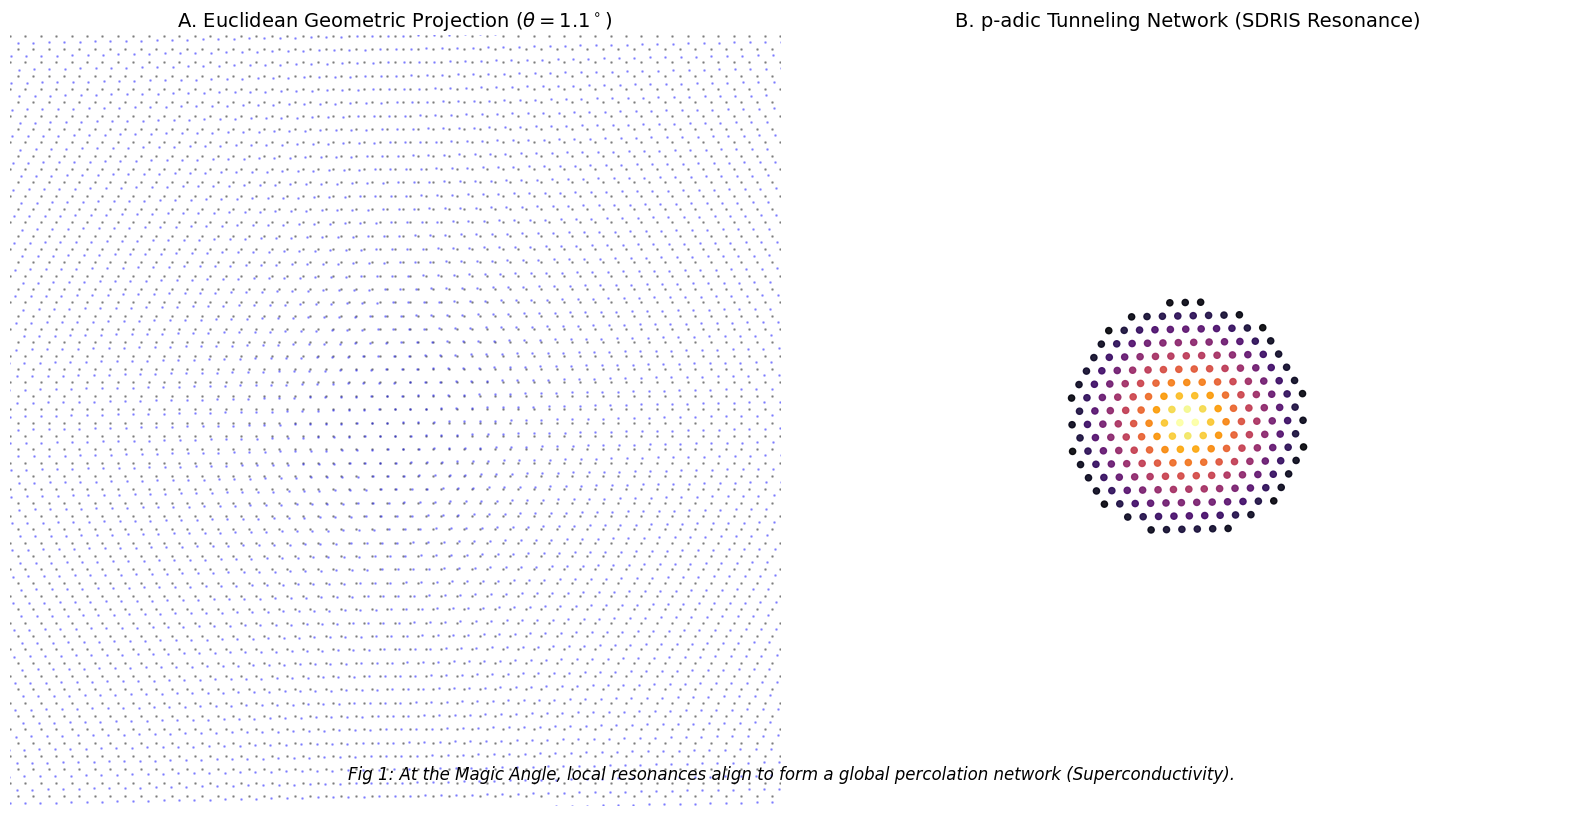

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_hex_grid(size, a=1.0):
    """Generiert ein hexagonales Gitter."""
    x_range = np.arange(-size, size, a)
    y_range = np.arange(-size, size, a * np.sqrt(3)/2)
    X, Y = np.meshgrid(x_range, y_range)

    # Verschiebung für Hex-Struktur
    X[::2] += a/2
    return X.flatten(), Y.flatten()

def rotate(x, y, theta_deg):
    """Rotiert Koordinaten um theta Grad."""
    theta = np.radians(theta_deg)
    c, s = np.cos(theta), np.sin(theta)
    xr = c*x - s*y
    yr = s*x + c*y
    return xr, yr

def plot_magic_angle_resonance():
    # Parameter
    a = 1.0  # Gitterkonstante
    size = 40 # Größe des Ausschnitts (in Einheiten von a)
    theta_magic = 1.1 # Der Magische Winkel

    # Gitter 1 (Statisch)
    x1, y1 = generate_hex_grid(size, a)

    # Gitter 2 (Rotiert)
    x2_raw, y2_raw = generate_hex_grid(size, a)
    x2, y2 = rotate(x2_raw, y2_raw, theta_magic)

    # Plot Setup
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # --- PANEL A: Geometrische Moiré Ansicht ---
    ax1.scatter(x1, y1, s=1, c='black', alpha=0.3, label='Layer 1')
    ax1.scatter(x2, y2, s=1, c='blue', alpha=0.3, label='Layer 2')
    ax1.set_title(f"A. Euclidean Geometric Projection ($\\theta = {theta_magic}^\circ$)", fontsize=14)
    ax1.set_aspect('equal')
    ax1.set_xlim(-25, 25)
    ax1.set_ylim(-25, 25)
    ax1.axis('off')

    # --- PANEL B: SDRIS p-adische Resonanz ---
    # Wir berechnen die "Topologische Nähe".
    # Punkte sind hell, wenn Layer 1 und Layer 2 sich fast berühren (Tunneling Condition)

    # Einfache Simulation der Resonanz: Wir suchen Überlappungen
    # In einem echten p-adischen Plot wäre dies die Norm-Differenz.
    # Hier visualisieren wir die Interferenz-Knoten.

    from scipy.spatial import cKDTree
    tree = cKDTree(np.c_[x1, y1])
    dist, _ = tree.query(np.c_[x2, y2], k=1)

    # Resonanz-Filter: Nur Punkte mit extrem kleinem Abstand (hohe Tunnelwahrscheinlichkeit)
    resonance_mask = dist < 0.15 * a

    # Plotten der "Tunnel-Brücken"
    sc = ax2.scatter(x2[resonance_mask], y2[resonance_mask],
                     c=dist[resonance_mask], cmap='inferno_r', s=20, alpha=0.9)

    ax2.set_title(f"B. p-adic Tunneling Network (SDRIS Resonance)", fontsize=14)
    ax2.set_aspect('equal')
    ax2.set_xlim(-25, 25)
    ax2.set_ylim(-25, 25)
    ax2.axis('off')

    # Annotation
    plt.figtext(0.5, 0.05, "Fig 1: At the Magic Angle, local resonances align to form a global percolation network (Superconductivity).",
                ha="center", fontsize=12, style='italic')

    plt.tight_layout()
    plt.savefig('SDRIS_MagicAngle_Resonance.png', dpi=300)
    plt.show()

# Ausführen
plot_magic_angle_resonance()